# LIGHT-1 Analysis Workshop

Please help us fix the timestamp! This is your viewing python notebook. 

Here you can examine your logfile section for errors. When you are done please run the following on a clear cell to submit and uplpoad your corrections.
```Python
rp.log_submit()
```

THANK YOU ~~AND HAVE FUN~~!


In [22]:
# Importing some libraries
import raadpy as rp

# Load the data filenames
raw_dir = './'
filenames = rp.get_filenames(raw_dir)
print(filenames)

# To have interactive plots in the jupyter notebook
%matplotlib widget

Warning! Cupy not found! GPU accelleration is not available

{'log': 'light1-se-log.txt'}


In [5]:
# Now we load the log file and find it's timestamps
log     = rp.log_expand(filename=raw_dir+filenames['log'])      # Load the logfile
log     = rp.log_with_timestamp(log,reorder=False)              # Find the timestamp that each command finished executing

Found weird command
 {'command': 'SE0>script delay 45fs list\n', 'output': ['ID  Name\t   Status  Type     Entries\t  Size\n', '0   fwUpdMain      OK      STATIC   1324          917 kB\n', '1   confMain       Locked  STATIC   3422          130 kB\n', '2   confMainB      Locked  STATIC   3422          130 kB\n', '3   confFall       Locked  STATIC   3422          130 kB\n', '4   confFallB      Locked  STATIC   3422          130 kB\n', '5   generalT       OK      LOG      7887/51471    1300 kB\n', '6   dataT          OK      LOG      7887/56118    13004 kB\n', '7   startupT       OK      LOG      38/9432       650 kB\n', '8   err            Empty   LOG      -             6502 kB\n', '9   use            OK      LOG      195/48015     6502 kB\n', '10  fwUpGoldenD    Locked  STATIC   1             65 kB\n', '11  fwUpGolden     Locked  STATIC   1324          1040 kB\n', '12  SE0state       OK      LOG      106/1204      130 kB\n', '13  SE1state       Empty   LOG      -             130 kB\n', 

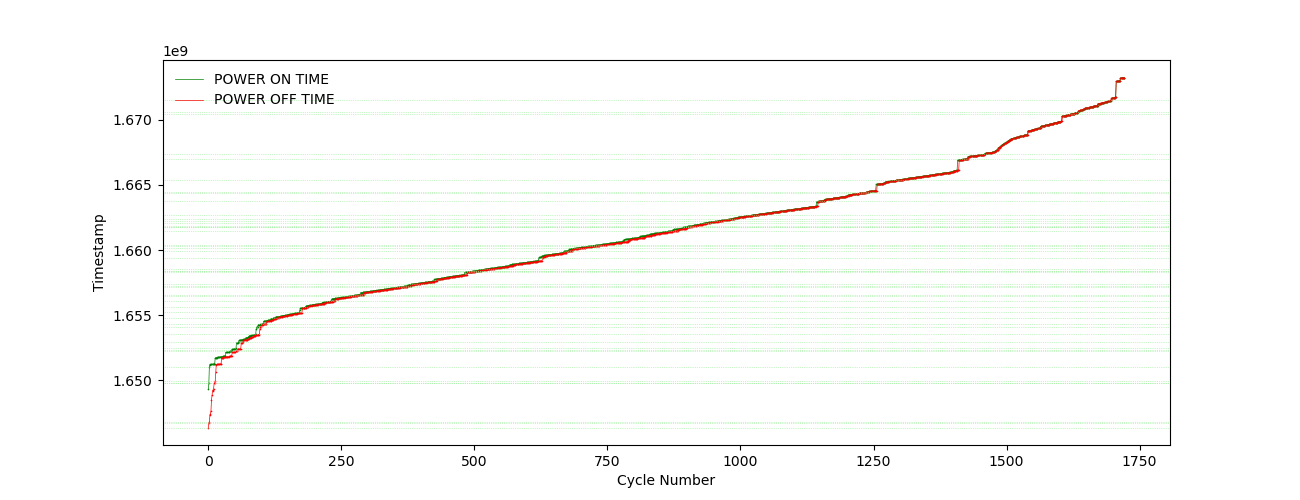

In [6]:
# Collect the timestamps for when an orbit started and ended
start_timestamps_log    = rp.collect_time_cmd(log,rp.PWR_ON_CMD)
end_timestamps_log      = rp.collect_time_cmd(log,rp.PWR_OFF_CMD)

# Match the two arrays from the back
end_timestamps_log, start_timestamps_log = rp.match(end_timestamps_log,start_timestamps_log)

# Get the unmatched cycles
# Goes from the end of the file, and if it sees a start without first seeing an end it records that entry.
UNMATCHED = rp.get_unmatched_cycles(log)

# Plot these
rp.plot_timestamps_log(start_timestamps_log,end_timestamps_log,UNMATCHED);

In [7]:
UNMATCHED[10]

{'command': 'SE0>csp txrx 4 14 600 0007010100\n',
 'output': ['Answer: 0000\n',
  'Bytes: 2\n',
  'Flags: 0x00 (frag=0, HMAC=0, XTEA=0, RDP=0, CRC32=0)\n',
  'OK\n'],
 'index': 264436,
 'timestamp': 1662390000.007263}

In [24]:
rp.PWR_ON_CMD

'txrx 4 14 600 0007010100'